损失函数：

$$
J(\theta) = C \sum^m_{i-1} \big[ y^{(i)}Cost_1(\theta^T x^{(i)} + (1-y^{(i)})Cost_0(\theta^T x^{(i)}) \big] + \frac{1}{2} \sum ^n _{j=1} \theta^2_j
$$

C 越大，误差项优化越多，容易过拟合。

### 线性可分 SVM

任务：观察参数C取值对决策边界的影响

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
data = sio.loadmat('./data/ex6data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [9]:
X, y = data['X'], data['y']
X[:5, :], y[:5, :]

(array([[1.9643, 4.5957],
        [2.2753, 3.8589],
        [2.9781, 4.5651],
        [2.932 , 3.5519],
        [3.5772, 2.856 ]]),
 array([[1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8))

In [10]:
X.shape, y.shape

((51, 2), (51, 1))

In [11]:
def plot_data():
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='jet')  # 根据 y 降维的值设置颜色
    plt.xlabel('x1')
    plt.ylabel('x2')

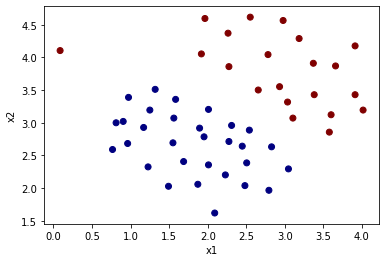

In [12]:
plot_data()

In [13]:
from sklearn.svm import SVC

In [14]:
svc1 = SVC(C=1, kernel='linear')
svc1.fit(X, y.flatten())    # 训练分类器 svc1

SVC(C=1, kernel='linear')

In [16]:
svc1.predict(X)    # 用训练好的分类器 svc1 做预测

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [17]:
svc1.score(X, y.flatten())   # svc1 的预测准确率得分

0.9803921568627451

In [18]:
def plot_boundary(model):
    x_min, x_max = -0.5, 4.5
    y_min, y_max = 1.3, 5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), 
                         np.linspace(y_min, y_max, 500))
    z = model.predict(np.c_[xx.flatten(), yy.flatten()])
    
    zz = z.reshape(xx.shape)
    plt.contour(xx, yy, zz)

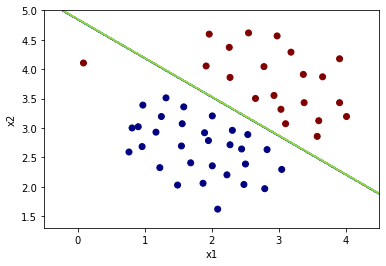

In [19]:
plot_boundary(svc1)
plot_data()

可以观察到，C取值比较小，离群的样本被错分。

In [20]:
svc100 = SVC(C=100, kernel='linear')
svc100.fit(X, y.flatten())

SVC(C=100, kernel='linear')

In [21]:
svc100.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [23]:
svc100.score(X, y.flatten())

1.0

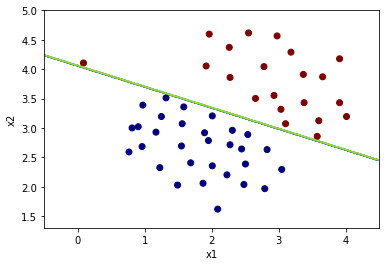

In [24]:
plot_boundary(svc100)
plot_data()

C很大，模型误差项优化权重高，把异常点也做了正确分类，形成过拟合